# **Importing Libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# **Loading the dataset, Data Preparation and Cleaning**

In [2]:
play=pd.read_csv("/kaggle/input/google-playstore-apps/Google-Playstore.csv")

In [3]:
play

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


# **Lets display all column names**

By looking at column names we can know about the specific columns (attributes) that are available to us for each app on Google Play store.

In [4]:
play.columns.values.tolist()

['App Name',
 'App Id',
 'Category',
 'Rating',
 'Rating Count',
 'Installs',
 'Minimum Installs',
 'Maximum Installs',
 'Free',
 'Price',
 'Currency',
 'Size',
 'Minimum Android',
 'Developer Id',
 'Developer Website',
 'Developer Email',
 'Released',
 'Last Updated',
 'Content Rating',
 'Privacy Policy',
 'Ad Supported',
 'In App Purchases',
 'Editors Choice',
 'Scraped Time']

**Lets remove empty entities if any for better results of data analysis**

In [5]:
play = play.dropna()

# **First I will use Bar graph to see the Total number of Apps for each category.**

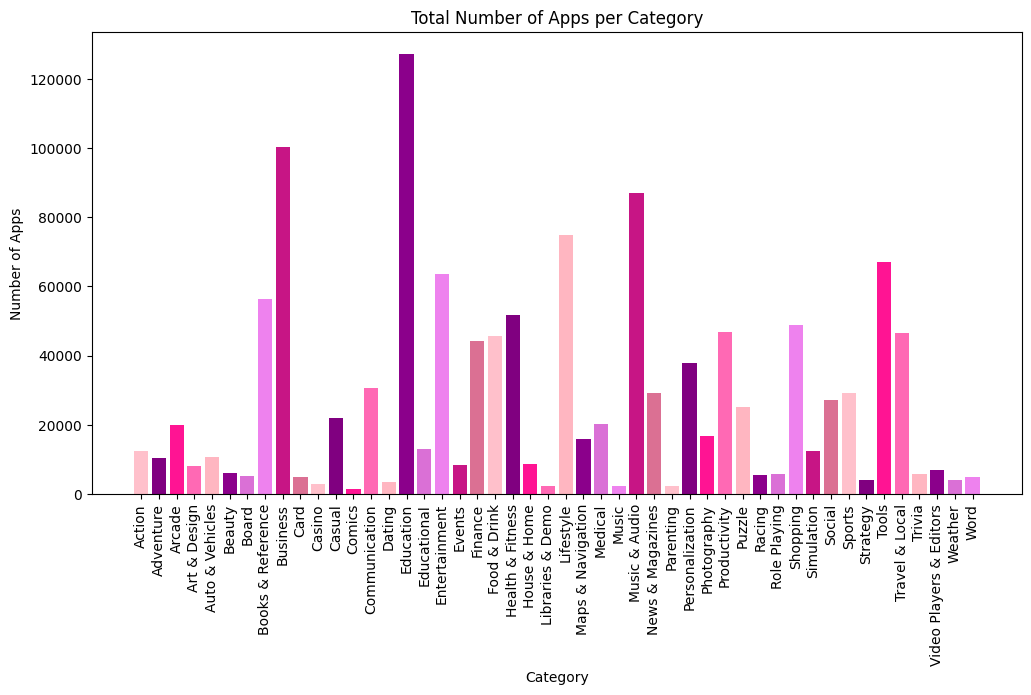

In [30]:
def plot_apps_per_category(data):
    
    # Here I will group by 'Category' and count the number of apps
    apps_per_category = data.groupby('Category').size()

    # I'm defining a list of colors because I want to plot the bar graph with different colors for each category
    colors = ['pink', 'purple', 'deeppink', 'hotpink', 'lightpink', 'darkmagenta', 'orchid', 'violet', 'mediumvioletred', 'palevioletred']

    plt.figure(figsize=(12, 6))
    bars = plt.bar(apps_per_category.index, apps_per_category, color=colors[:len(apps_per_category)])
    plt.title('Total Number of Apps per Category')
    plt.xlabel('Category')
    plt.ylabel('Number of Apps')
    plt.xticks(rotation=90)

    plt.show()

plot_apps_per_category(play)

# **Next I will compare the 'ratings' with the 'price' of the apps to see relation b/w them using Scatter Plot**

*I created a function to visualize relationship b/w price and rating. I used scatter plot to show how ratings vary across different price points, providing insights into whether users are willing to pay more for higher-rated apps or if there's any correlation between price and rating.*

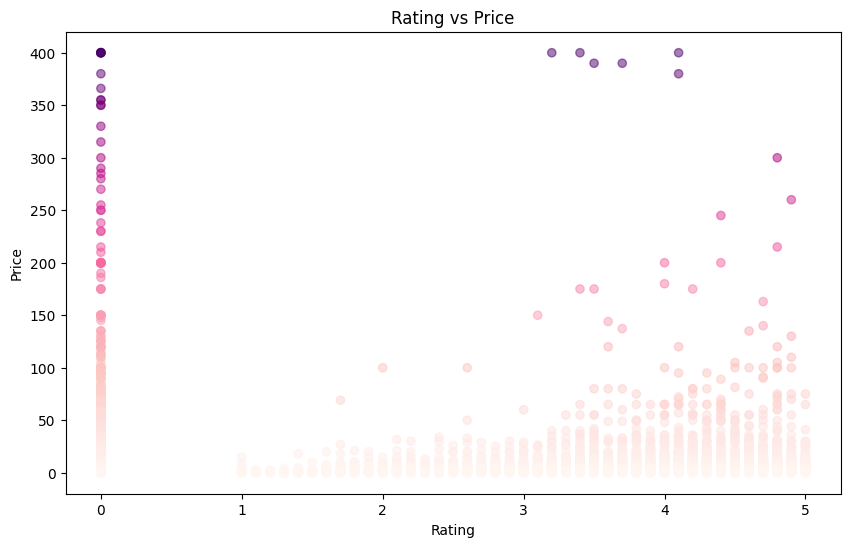

In [31]:

def plot_rating_vs_price(data):
    plt.figure(figsize=(10,6))
    plt.scatter(data['Rating'], data['Price'], c=data['Price'], cmap='RdPu', alpha=0.5)
    plt.title('Rating vs Price')
    plt.xlabel('Rating')
    plt.ylabel('Price')
    plt.show()

plot_rating_vs_price(play)

# **Now I will check correlation between different variables in the dataset using Heatmap**

*I am only selecting numerical columns because most of apps attributes (columns) on play store data contain categorical data.*

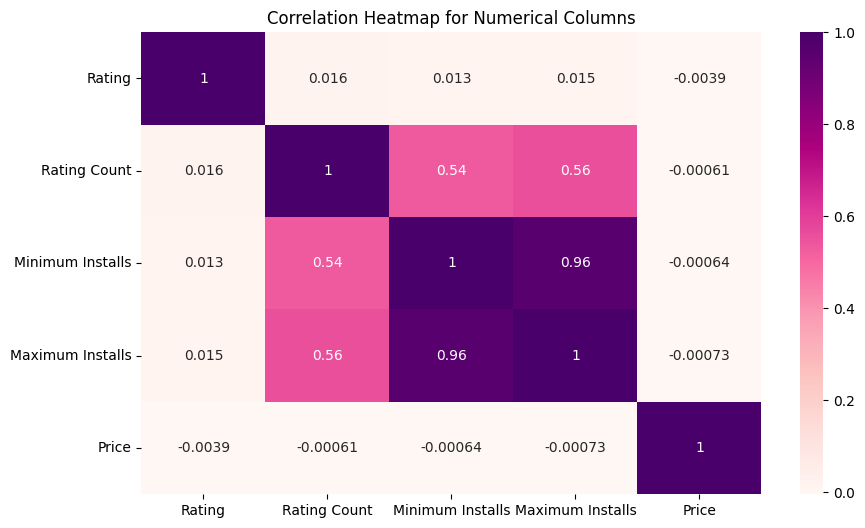

In [12]:
def plot_correlation_heatmap(data):
    
    # Selecting numerical columns only
    numerical_data = data.select_dtypes(include=['int64', 'float64'])
    
    plt.figure(figsize=(10,6))
    sns.heatmap(numerical_data.corr(), annot=True, cmap='RdPu')
    plt.title('Correlation Heatmap for Numerical Columns')
    plt.show()


plot_correlation_heatmap(play)